In [728]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  

In [729]:
label_encoder= LabelEncoder()
df['Item_Store_ID']= label_encoder.fit_transform(df['Item_Store_ID'])
df['Item_Sugar_Content']= label_encoder.fit_transform(df['Item_Sugar_Content'])
df['Item_Type']= label_encoder.fit_transform(df['Item_Type'])
df['Store_Size']= label_encoder.fit_transform(df['Store_Size'])
df['Store_Location_Type']= label_encoder.fit_transform(df['Store_Location_Type'])
df['Store_Type']= label_encoder.fit_transform(df['Store_Type'])
df['Item_ID']= label_encoder.fit_transform(df['Item_ID'])



In [730]:
df=pd.read_csv("train.csv")
df.head(10)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.60,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.60,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.60,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.60,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.60,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77
5,DRA12,BABATUNJI045,DRA12_BABATUNJI045,11.60,Low Sugar,0.000000,Soft Drinks,354.04,2009,NaN,Cluster 2,Supermarket Type1,9572.54
6,DRA24,BABATUNJI010,DRA24_BABATUNJI010,19.35,Normal Sugar,0.066832,Soft Drinks,409.72,2005,NaN,Cluster 3,Grocery Store,818.93
7,DRA24,BABATUNJI013,DRA24_BABATUNJI013,19.35,Normal Sugar,0.039895,Soft Drinks,406.22,1994,High,Cluster 3,Supermarket Type1,11055.61
8,DRA24,BABATUNJI017,DRA24_BABATUNJI017,19.35,Normal Sugar,0.040154,Soft Drinks,411.72,2014,NaN,Cluster 2,Supermarket Type1,2866.27
9,DRA24,BABATUNJI019,DRA24_BABATUNJI019,NaN,Normal Sugar,0.069909,Soft Drinks,408.22,1992,Small,Cluster 1,Grocery Store,1228.40


In [731]:
df.tail()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
4985,NCZ54,BABATUNJI019,NCZ54_BABATUNJI019,NaN,Low Sugar,0.145952,Household,402.39,1992,Small,Cluster 1,Grocery Store,406.14
4986,NCZ54,BABATUNJI027,NCZ54_BABATUNJI027,NaN,Low Sugar,0.082956,Household,410.14,1992,Medium,Cluster 3,Supermarket Type3,13808.69
4987,NCZ54,BABATUNJI045,NCZ54_BABATUNJI045,14.65,Low Sugar,0.083528,Household,406.14,2009,NaN,Cluster 2,Supermarket Type1,5685.93
4988,NCZ54,BABATUNJI046,NCZ54_BABATUNJI046,14.65,Low Sugar,0.083359,Household,404.89,2004,Small,Cluster 1,Supermarket Type1,11778.00
4989,NCZ54,BABATUNJI049,NCZ54_BABATUNJI049,14.65,Low Sugar,0.083489,Household,403.39,2006,Medium,Cluster 1,Supermarket Type1,17870.07


In [732]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [733]:
df.columns

Index(['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Weight',
       'Item_Sugar_Content', 'Item_Visibility', 'Item_Type', 'Item_Price',
       'Store_Start_Year', 'Store_Size', 'Store_Location_Type', 'Store_Type',
       'Item_Store_Returns'],
      dtype='object')

In [734]:
df.describe()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


In [735]:
df.nunique()

Item_ID                1451
Store_ID                 10
Item_Store_ID          4990
Item_Weight             399
Item_Sugar_Content        3
Item_Visibility        4638
Item_Type                16
Item_Price             3522
Store_Start_Year          9
Store_Size                3
Store_Location_Type       3
Store_Type                4
Item_Store_Returns     2686
dtype: int64

In [736]:
df.isnull().sum()

Item_ID                   0
Store_ID                  0
Item_Store_ID             0
Item_Weight             802
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size             1450
Store_Location_Type       0
Store_Type                0
Item_Store_Returns        0
dtype: int64

In [737]:
df.dtypes

Item_ID                 object
Store_ID                object
Item_Store_ID           object
Item_Weight            float64
Item_Sugar_Content      object
Item_Visibility        float64
Item_Type               object
Item_Price             float64
Store_Start_Year         int64
Store_Size              object
Store_Location_Type     object
Store_Type              object
Item_Store_Returns     float64
dtype: object

In [738]:
df.shape

(4990, 13)

In [739]:
correlation = df.corr()
df.corr()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns
Item_Weight,1.000000,-0.025951,0.028609,0.009313,0.015322
Item_Visibility,-0.025951,1.000000,-0.032835,-0.087939,-0.164943
Item_Price,0.028609,-0.032835,1.000000,0.160032,0.518285
Store_Start_Year,0.009313,-0.087939,0.160032,1.000000,0.051297
Item_Store_Returns,0.015322,-0.164943,0.518285,0.051297,1.000000


<AxesSubplot:>

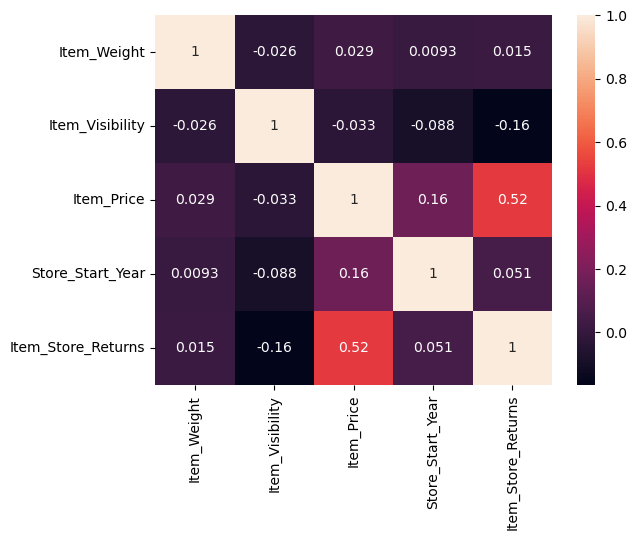

In [740]:
sns.heatmap(correlation, annot=True)

(array([14., 13., 15., 11.,  8.,  6.,  6., 11.,  3., 13.]),
 array([ 17. , 114.8, 212.6, 310.4, 408.2, 506. , 603.8, 701.6, 799.4,
        897.2, 995. ]),
 <BarContainer object of 10 artists>)

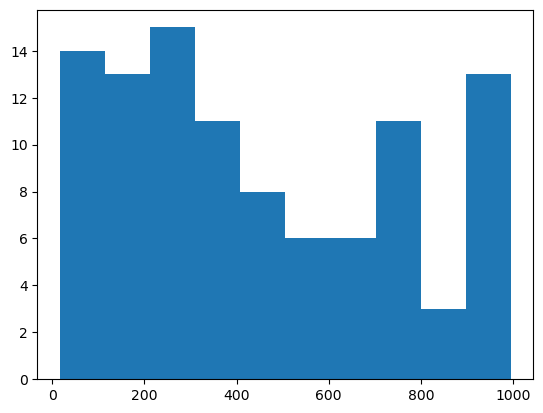

In [741]:
from random import sample
df = sample(range(1, 1000), 100)
plt.hist(df)

In [742]:
#df= pd.DataFrame(df)
df=pd.read_csv("train.csv")
df.head(5)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [743]:
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].mean())

In [744]:
#df['Item_Weight'].fillna(method = 'ffill', inplace = True)
df['Store_Size'].fillna(method = 'ffill', inplace = True)
df['Store_Size'].fillna(method = 'bfill', inplace = True)

df.isnull().sum()

Item_ID                0
Store_ID               0
Item_Store_ID          0
Item_Weight            0
Item_Sugar_Content     0
Item_Visibility        0
Item_Type              0
Item_Price             0
Store_Start_Year       0
Store_Size             0
Store_Location_Type    0
Store_Type             0
Item_Store_Returns     0
dtype: int64

In [745]:
df.groupby(['Item_Store_ID'])['Item_Visibility',"Item_Price"].sum()

C:\Users\MIRAH\AppData\Local\Temp\ipykernel_2920\3662493083.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Item_Store_ID'])['Item_Visibility',"Item_Price"].sum()


,Item_Visibility,Item_Price
Item_Store_ID,,
DRA12_BABATUNJI010,0.068535,357.54
DRA12_BABATUNJI013,0.040912,355.79
DRA12_BABATUNJI017,0.041178,350.79
DRA12_BABATUNJI018,0.041113,355.04
DRA12_BABATUNJI035,0.000000,354.79
...,...,...
NCZ54_BABATUNJI019,0.145952,402.39
NCZ54_BABATUNJI027,0.082956,410.14
NCZ54_BABATUNJI045,0.083528,406.14


In [746]:
#plt.figure(figsize=(6,5)) 
#sns.countplot(x="Item_Store_ID", hue="Item_Price", data=df, palette="coolwarm")
#plt.title("item id vs price")
#plt.show()

In [747]:
label_counts = df["Item_Store_ID"].value_counts()
df["Item_Store_ID"].value_counts()
valid_labels = label_counts[label_counts >1].index
df_filtered = df[df["Item_Store_ID"].isin(valid_labels)]

In [748]:
df.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,High,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,High,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [749]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  

In [750]:
df=pd.read_csv("test.csv")
df.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
0,DRA59,BABATUNJI010,DRA59_BABATUNJI010,8.270,Normal Sugar,0.214125,Soft Drinks,459.98,2005,NaN,Cluster 3,Grocery Store
1,DRA59,BABATUNJI013,DRA59_BABATUNJI013,8.270,Normal Sugar,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1
2,DRB01,BABATUNJI013,DRB01_BABATUNJI013,7.390,Low Sugar,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1
3,DRB13,BABATUNJI010,DRB13_BABATUNJI010,6.115,Normal Sugar,0.011791,Soft Drinks,472.63,2005,NaN,Cluster 3,Grocery Store
4,DRB13,BABATUNJI013,DRB13_BABATUNJI013,6.115,Normal Sugar,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1


In [751]:
df.isnull().sum()

Item_ID                  0
Store_ID                 0
Item_Store_ID            0
Item_Weight            661
Item_Sugar_Content       0
Item_Visibility          0
Item_Type                0
Item_Price               0
Store_Start_Year         0
Store_Size             959
Store_Location_Type      0
Store_Type               0
dtype: int64

In [752]:
df['Item_Weight'].fillna(method = 'ffill', inplace = True)
df['Store_Size'].fillna(method = 'bfill', inplace = True)

df.isnull().sum()

Item_ID                0
Store_ID               0
Item_Store_ID          0
Item_Weight            0
Item_Sugar_Content     0
Item_Visibility        0
Item_Type              0
Item_Price             0
Store_Start_Year       0
Store_Size             0
Store_Location_Type    0
Store_Type             0
dtype: int64

In [753]:
df.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
0,DRA59,BABATUNJI010,DRA59_BABATUNJI010,8.270,Normal Sugar,0.214125,Soft Drinks,459.98,2005,High,Cluster 3,Grocery Store
1,DRA59,BABATUNJI013,DRA59_BABATUNJI013,8.270,Normal Sugar,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1
2,DRB01,BABATUNJI013,DRB01_BABATUNJI013,7.390,Low Sugar,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1
3,DRB13,BABATUNJI010,DRB13_BABATUNJI010,6.115,Normal Sugar,0.011791,Soft Drinks,472.63,2005,High,Cluster 3,Grocery Store
4,DRB13,BABATUNJI013,DRB13_BABATUNJI013,6.115,Normal Sugar,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1


In [754]:
df.head(20)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
0,DRA59,BABATUNJI010,DRA59_BABATUNJI010,8.270,Normal Sugar,0.214125,Soft Drinks,459.98,2005,High,Cluster 3,Grocery Store
1,DRA59,BABATUNJI013,DRA59_BABATUNJI013,8.270,Normal Sugar,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1
2,DRB01,BABATUNJI013,DRB01_BABATUNJI013,7.390,Low Sugar,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1
3,DRB13,BABATUNJI010,DRB13_BABATUNJI010,6.115,Normal Sugar,0.011791,Soft Drinks,472.63,2005,High,Cluster 3,Grocery Store
4,DRB13,BABATUNJI013,DRB13_BABATUNJI013,6.115,Normal Sugar,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1
5,DRB25,BABATUNJI017,DRB25_BABATUNJI017,12.300,Low Sugar,0.069853,Soft Drinks,268.73,2014,Medium,Cluster 2,Supermarket Type1
6,DRB25,BABATUNJI027,DRB25_BABATUNJI027,12.300,Low Sugar,0.069123,Soft Drinks,265.23,1992,Medium,Cluster 3,Supermarket Type3
7,DRB25,BABATUNJI035,DRB25_BABATUNJI035,12.300,Low Sugar,0.069447,Soft Drinks,265.98,2011,Small,Cluster 2,Supermarket Type1
8,DRB48,BABATUNJI017,DRB48_BABATUNJI017,16.750,Normal Sugar,0.024994,Soft Drinks,93.71,2014,Medium,Cluster 2,Supermarket Type1
9,DRB48,BABATUNJI027,DRB48_BABATUNJI027,16.750,Normal Sugar,0.024733,Soft Drinks,100.71,1992,Medium,Cluster 3,Supermarket Type3


In [755]:
label_encoder= LabelEncoder()
df['Item_Store_ID']= label_encoder.fit_transform(df['Item_Store_ID'])
df['Item_Sugar_Content']= label_encoder.fit_transform(df['Item_Sugar_Content'])
df['Item_Type']= label_encoder.fit_transform(df['Item_Type'])
df['Store_Size']= label_encoder.fit_transform(df['Store_Size'])
df['Store_Location_Type']= label_encoder.fit_transform(df['Store_Location_Type'])
df['Store_Type']= label_encoder.fit_transform(df['Store_Type'])
df['Item_ID']= label_encoder.fit_transform(df['Item_ID'])



In [756]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

 
#handle missing values
imputer= SimpleImputer(strategy='median')
df['Item_Store_ID']= imputer.fit_transform(df[['Item_Store_ID']])
#df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
#df['Fare']= imputer.fit_transform(df[['Fare']])

#Drop the 'cabin' column
df.drop(columns=['Item_ID',"Store_ID","Store_Size","Store_Location_Type"])
#encode categorical variables
label_encoder= LabelEncoder()
df['Item_Store_ID']= label_encoder.fit_transform(df['Item_Store_ID'])
df['Item_Sugar_Content']= label_encoder.fit_transform(df['Item_Sugar_Content'])
df['Item_Type']= label_encoder.fit_transform(df['Item_Type'])
df['Store_Size']= label_encoder.fit_transform(df['Store_Size'])
df['Store_Location_Type']= label_encoder.fit_transform(df['Store_Location_Type'])
df['Store_Type']= label_encoder.fit_transform(df['Store_Type'])
df['Store_ID']= label_encoder.fit_transform(df['Store_ID'])



#Store_ID

#define features and target variable
x= df.drop(columns=['Item_Store_ID'])#features
y= df['Item_Store_ID']#our target

#split the data into training and testing sets
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

#scale the features
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

print('Data Processing Completed')

Data Processing Completed


In [757]:
print(len(df))

3532


In [758]:
print(x.shape)

(3532, 11)


In [759]:
print(y.shape)

(3532,)


In [760]:
print(len(x), len(y))
print(x.shape, y.shape)
print(len(x_train), len(y_train))

3532 3532
(3532, 11) (3532,)
2825 2825


In [761]:
train , x_test , y_train , y_test =train_test_split(x,y, test_size = 0.8 , random_state = 42)




In [762]:
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=42)


print("Training set size:", x_test.shape)
print("Testiimg set size:", x_test.shape)

Training set size: (2826, 11)
Testiimg set size: (2826, 11)


In [763]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [764]:
param_dist= {
    "n_estimators": [10,50,100,200,500],
    "max_depth":[None,5,10,15],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,5,10],
    "bootstrap": [True, False] 
}

In [765]:
rfc = RandomForestClassifier(random_state = 42)
random_search = RandomizedSearchCV(estimator = rfc,param_distributions=param_dist, cv=5,n_iter = 10)

In [766]:
x_train , x_test , y_train , y_test =train_test_split(x,y, test_size = 0.2 ,random_state = 42)
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)



RandomForestRegressor(random_state=42)

In [767]:
y_pred = model.predict(x_test)

In [768]:
print("predictions:",  y_pred[:10])
print("Actual:", y_test[:10].values)

predictions: [ 325.76 3407.42 3184.73  743.8   295.25 2901.13 2369.91 1617.57  138.95
 2326.81]
Actual: [ 325 3408 3186  746  299 2902 2372 1615  139 2329]


In [769]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" ,mse)

Mean Squared Error: 3.0253550212164195


In [770]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_pred)
print("Accuracy (R2 score):", accuracy)

Accuracy (R2 score): 0.999997192629266


In [771]:
print(df["Item_Store_ID"].min(), df["Item_Store_ID"].max())

0 3531


In [772]:
predictions = model.predict(x_test)
from sklearn.metrics import mean_absolute_error, r2_score
mae=mean_absolute_error(y_test, predictions)
r2= r2_score(y_test,predictions)

print("MAE:", mae)
print("R2:", r2)

MAE: 1.4063366336633691
R2: 0.999997192629266


In [773]:
test_df=pd.read_csv("test.csv")
test_df.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
0,DRA59,BABATUNJI010,DRA59_BABATUNJI010,8.270,Normal Sugar,0.214125,Soft Drinks,459.98,2005,NaN,Cluster 3,Grocery Store
1,DRA59,BABATUNJI013,DRA59_BABATUNJI013,8.270,Normal Sugar,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1
2,DRB01,BABATUNJI013,DRB01_BABATUNJI013,7.390,Low Sugar,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1
3,DRB13,BABATUNJI010,DRB13_BABATUNJI010,6.115,Normal Sugar,0.011791,Soft Drinks,472.63,2005,NaN,Cluster 3,Grocery Store
4,DRB13,BABATUNJI013,DRB13_BABATUNJI013,6.115,Normal Sugar,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1


In [774]:
test_df = test_df.fillna(0)

In [775]:
test_df.isnull().sum()
#x_submit = test_df.drop(columns=["Item_Store_ID"])

Item_ID                0
Store_ID               0
Item_Store_ID          0
Item_Weight            0
Item_Sugar_Content     0
Item_Visibility        0
Item_Type              0
Item_Price             0
Store_Start_Year       0
Store_Size             0
Store_Location_Type    0
Store_Type             0
dtype: int64

In [776]:
label_encoder= LabelEncoder()
#test_df['Item_Store_ID']= label_encoder.fit_transform(test_df['Item_Store_ID'])
test_df['Item_Sugar_Content']= label_encoder.fit_transform(test_df['Item_Sugar_Content'])
test_df['Item_Type']= label_encoder.fit_transform(test_df['Item_Type'])
#test_df['Store_Size']= label_encoder.fit_transform(test_df['Store_Size'])
test_df['Store_Location_Type']= label_encoder.fit_transform(test_df['Store_Location_Type'])
test_df['Store_Type']= label_encoder.fit_transform(test_df['Store_Type'])
#df['Item_ID']= label_encoder.fit_transform(df['Item_ID'])
test_df['Item_ID']= label_encoder.fit_transform(test_df['Item_ID'])


In [777]:
from sklearn.preprocessing import LabelEncoder
x_submit_encoded = x_submit.copy()
for col in x_submit_encoded.select_dtypes(include="object").columns:
    le = LabelEncoder()
    x_submit_encoded[col] ==le.fit_transform(x_submit_encoded[col].astype(str))

In [778]:
#predictions = model.predict(x_submit)
test_df.drop(columns=["Store_ID","Store_Size","Store_Location_Type"])
#submission = pd.DataFrame({
    #"ID": test_df["Item_Store_ID"],
    #"Item_Store_ID": predictions
#})

df['Item_Store_ID']= label_encoder.fit_transform(df['Item_Store_ID'])


#from sklearn.preprocessing import LabelEncoder
#label_encoder= LabelEncoder()
#test_df['Item_Store_ID']= label_encoder.fit_transform(test_df['Item_Store_ID'])
#test_df['Item_ID']= le_gender.fit_transform(test_df['Item_ID'])

#test_df["Item_Store_ID"]= le_gender.transform(test_df["Item_Store_ID"])


In [779]:
import pandas as pd
test_df = pd.read_csv("test.csv")
print(len(test_df))

3532


In [780]:
X_submit = test_df.drop(columns=["Item_ID"])

In [781]:
print(X_submit.shape)

(3532, 11)


In [782]:
#X_submit = test_df.drop(columns=["Item_Store_ID"])
from sklearn.preprocessing import LabelEncoder
#x_submit_encoded = x_submit.copy()
for col in x_submit.select_dtypes(include="object").columns:
    le = LabelEncoder()
    x_submit[col] =le.fit_transform(x_submit[col].astype(str))

In [783]:
predictions = model.predict(x_test)
print(len(predictions))

707


In [785]:
#import pandas as pd
#submission = pd.DataFrame({
  #  "Item_ID": test_df["Item_ID"],
   # "store_restore": predictions
    
##})
#submission.to_csv("Zindi_submission.csv", index=False)

In [786]:
print(x_submit.dtypes)

Item_ID                  int32
Store_ID                 int32
Item_Weight            float64
Item_Sugar_Content       int32
Item_Visibility        float64
Item_Type                int32
Item_Price             float64
Store_Start_Year         int64
Store_Size               int32
Store_Location_Type      int32
Store_Type               int32
dtype: object


In [787]:
test_df['Item_Store_ID']= label_encoder.fit_transform(test_df['Item_Store_ID'])


In [788]:
print(x_submit.dtypes)

Item_ID                  int32
Store_ID                 int32
Item_Weight            float64
Item_Sugar_Content       int32
Item_Visibility        float64
Item_Type                int32
Item_Price             float64
Store_Start_Year         int64
Store_Size               int32
Store_Location_Type      int32
Store_Type               int32
dtype: object


In [789]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
test_df['Item_Store_ID']= label_encoder.fit_transform(test_df['Item_Store_ID'])
test_df['Item_ID']= le_gender.fit_transform(test_df['Item_ID'])

In [790]:
print(x_submit.dtypes)

Item_ID                  int32
Store_ID                 int32
Item_Weight            float64
Item_Sugar_Content       int32
Item_Visibility        float64
Item_Type                int32
Item_Price             float64
Store_Start_Year         int64
Store_Size               int32
Store_Location_Type      int32
Store_Type               int32
dtype: object


In [791]:
X_submit =X_submit.reindex(columns=X_submit.columns,fill_value=0)

In [792]:
#predictions = model.predict(X_submit)
print(len(predictions))

707


In [793]:
X_test=test_df.drop(columns= ["Item_Store_ID"])
predictions = model.predict(X_test)

ValueError: could not convert string to float: 'BABATUNJI010'